<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [2]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [5]:
import torch.nn as nn

In [6]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [7]:
mynet = MyNeuralNet().to(device)

In [14]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[ 0.0979, -0.3836],
        [-0.3866, -0.2679],
        [-0.1367,  0.0192],
        [ 0.7219,  1.0450],
        [-0.0294, -0.0376],
        [ 0.4645, -0.4207],
        [-0.4782,  0.5059],
        [-0.5030, -0.1555]], requires_grad=True)

In [23]:
mynet.input_to_hidden_layer.bias

Parameter containing:
tensor([ 0.2599,  0.6398, -0.1652, -0.2301, -0.6925, -0.4011, -0.2813, -0.3017],
       requires_grad=True)

In [22]:
mynet.hidden_to_output_layer.weight

Parameter containing:
tensor([[ 0.0284,  0.1880, -0.2101,  1.0957,  0.2515, -0.2718,  0.0084, -0.3212]],
       requires_grad=True)

In [15]:
loss_func = nn.MSELoss()

In [16]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(0.0271, grad_fn=<MseLossBackward>)


In [17]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [18]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

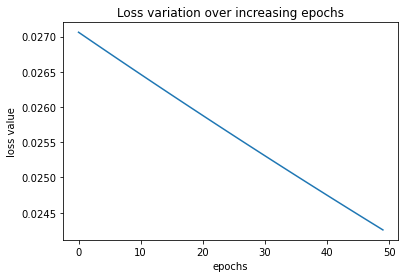

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')